# Challenge harmonic forecasting 
### di Michele Zanotti 

## Import e preprocessing

Importing libraries to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import seaborn as sns
from darts import TimeSeries
from darts.models import (FFT)
from darts.utils.missing_values import fill_missing_values
from darts.metrics import (mae,mape, mase, rmse,mse)

Importing the dataset aus_cafe.csv, converting this datasset into a Time series, and creating the training and validation datasets

In [3]:
df = pd.read_csv("D:\\UNIVERSITÁ\\TIME SERIES AND FORECASTING\\Challenge\\aus_cafe.csv", sep=';')
df = TimeSeries.from_dataframe(df, 'Month', 'Turnover')
train,val = df[:126], df[126:181]

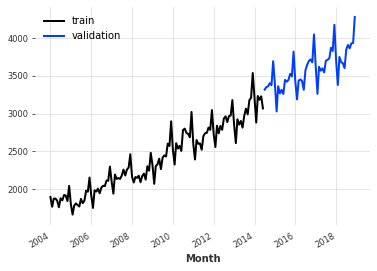

In [4]:
train.plot(label = 'train')
val.plot(label = 'validation')

## Smart implementation

This implementation relies on the package Darts which is a package to analyze time series. In the cell below i choose the model to apply and than train it on the training dataset

In [5]:
model = FFT(trend='poly', trend_poly_degree = 1,nr_freqs_to_keep=200)
model.fit(train)
pred_val = model.predict(len(val))

MAE: 196.82989886264295
MAPE: 5.3617658777473745
MASE: 1.6082240554968963
RMSE: 250.13722901677917
MSE: 62568.63334019264


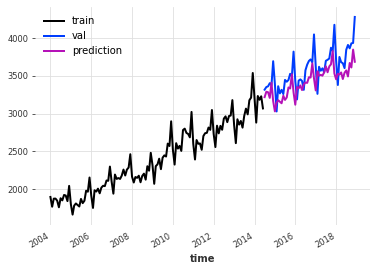

In [9]:
train.plot(label='train')
val.plot(label='val')
pred_val.plot(label='prediction', low_quantile = 0.05, high_quantile = 0.95)
print("MAE:", mae(pred_series = pred_val, actual_series = val))
print("MAPE:", mape(pred_series = pred_val, actual_series = val))
print("MASE:", mase(pred_series = pred_val, actual_series = val, insample = train))
print("RMSE:", rmse(pred_series = pred_val, actual_series = val))
print("MSE:", mse(pred_series = pred_val, actual_series = val))

## Another implementation selfmade

This implementation is made by myself and there are few steps:
1. Dividing the dataset into training and testing
2. Detrend the data
3. Make a Fourier Transform on the training dataset
4. Keep only few frequencies of the Transform
5. Generate a new signal composed by a sum of cosines with the frequencies and phases calculated from the Fourier transform
6. Sum the trend to de generated signal
7. Compare the predicted signal with the real one

## 1.

In [37]:
dt = pd.read_csv("D:\\UNIVERSITÁ\\TIME SERIES AND FORECASTING\\Challenge\\aus_cafe.csv", sep=';')

In [38]:
training = dt[:126]
testing = dt[126:181]

In [39]:
a = []
a = training['Turnover'].tolist()
t1 = training.index.tolist()
t1 = [int(item) for item in t1]
b = testing['Turnover'].tolist()
t2 = testing.index.tolist()
t2 = [int(item) for item in t2]

## 2.

In [40]:
p1 = np.polyfit(t1, a, 1)
p1 = [float(item) for item in p1]

In [41]:
t1_corr = [item*p1[0] for item in t1]
a_notrand = []
for i in range(0, len(t1_corr)):
    a_notrand.append(a[i] - t1_corr[i])

## 3.

In [42]:
a_freq = fft.fft(a_notrand)
f = fft.fftfreq(len(t1))
indexes = []
for i in range(len(t1)):
    indexes.append(i)
indexes.sort(key = lambda i: np.absolute(f[i]))

In [43]:
t = np.arange(0, len(t1) + len(t2))
segnale_giusto = np.zeros(len(t))

## 4. / 5. / 6.

In [44]:
for i in indexes[:1 + 100 * 2]:
    ampli = np.absolute(a_freq[i]) / len(t1)   # amplitude
    fase = np.angle(a_freq[i])          # phase
    segnale_giusto += ampli * np.cos(np.pi * f[i] * t + fase)
tot = segnale_giusto + p1[0] * t
pred = tot[t2[0]:t2[-1]+1]

## 7.

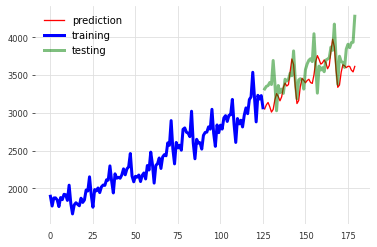

In [45]:
plt.plot(t2, tot[t2[0]:t2[-1]+1], 'r', label = 'prediction')
plt.plot(t1, a, 'b', label = 'training', linewidth = 3)
plt.plot(t2, b, 'g', label = 'testing', linewidth = 3, alpha =0.5)
plt.legend()
plt.show()